In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [2]:
random.seed(1852026)

In [3]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [4]:
def initializeParams(N=5):
    n=2
    n_y=1
    W = np.random.randn(N,n) 
    bias = np.random.randn(N,1) 
    V = np.random.randn(n_y,N) 
    a=pd.DataFrame(V.T)
    a[2]=W[:,0]
    a[3]=W[:,1]
    a[4]=bias
    omega=np.matrix(a)
    
 
   
    return W,bias,V,omega

In [5]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [6]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [7]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])


n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 10 # size of the hidden layer, # neurons, this is just for the moment to have some example

In [8]:
df.head()

,x1,x2,y
0,-1.262271,0.746859,0.461002
1,-0.804355,0.937081,0.617336
2,-1.805674,0.738389,-0.053984
3,-0.888805,0.061711,1.943678
4,-1.667562,-0.534543,2.127070


# Question 1. (Full minimization)

### MLP network

In [9]:
W,bias,V,omega=initializeParams()
ro=10**-5 #10-5 unti, 10-3
sigma=1
N=5

In [10]:
print(V,'\n')
print(W,'\n')
print(bias)

[[ 0.4066268  -0.03836368  1.1183343   0.90678926  2.85564802]] 

[[-1.08931521 -0.78393244]
 [-1.16103627  1.76457722]
 [-0.35364355  0.64948471]
 [-0.30972797  1.63847142]
 [-0.13094134 -0.79454636]] 

[[ 1.18412067]
 [-1.13400949]
 [ 0.5428843 ]
 [ 0.99265825]
 [ 1.41821198]]


In [11]:
'''
X=X_train
true=Y_train
a=pd.DataFrame(V.T)
a[2]=W[:,0]
a[3]=W[:,1]
a[4]=bias
omega=np.matrix(a)

N=5
'''

def second_norm(omega):
    return np.linalg.norm(omega)**2   #,2)#**2

def activation_f(t,sigma=1):
    return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)

def predict(omega,X,params):  

    #params=
    r=omega.flatten().shape[0]
    try:
        c=omega.flatten().shape[1]
        
        N=int(omega.shape[1]/4)

    except:
            N=int(omega.shape[0]/4)
    V=omega.T[:N].reshape(1,N)
    W=omega.T[N:N+2*N].reshape(N,2)
    
    bias=omega.T[N+2*N:].reshape(N,1)
    
    t=W.dot(X)-bias

    
    predicted_values=V.dot(activation_f(t,sigma))
    return predicted_values#, W,bias




def reg_tr_error(omega,functionArgs):
    X=functionArgs[0]
    true=functionArgs[1]
 
    r=omega.flatten().shape[0]
    try:
        c=omega.flatten().shape[1]
        
        N=int(omega.shape[1]/4)

    except:
            N=int(omega.shape[0]/4)
    
    predicted=predict(omega,X)
  
    
    err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
    err_all=err.dot(err.T)

    
    P=X.shape[1]
    return ((err_all)/(2*P)+ro*second_norm(omega)).item(0)

In [12]:
omega

matrix([[ 0.4066268 , -1.08931521, -0.78393244,  1.18412067],
        [-0.03836368, -1.16103627,  1.76457722, -1.13400949],
        [ 1.1183343 , -0.35364355,  0.64948471,  0.5428843 ],
        [ 0.90678926, -0.30972797,  1.63847142,  0.99265825],
        [ 2.85564802, -0.13094134, -0.79454636,  1.41821198]])

In [13]:
z=omega.flatten()
z.flatten().shape

(1, 20)

In [14]:
reg_tr_error(omega.flatten(),[X_train,Y_train])

0.9904033968242308

In [15]:
res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
print(res['fun'],'\n',res['x'])

0.046828356794164805 
 [ 12.14068433  -2.28647773  -1.78354783   0.77727528 -14.10355915
  -0.55460596  -0.3272758   -2.91073898  -0.06975471  -2.4821395
   0.21511749  -0.20045662   5.72831678  -0.09736898  -0.08547429
   1.06796035   4.03422159  -1.31221015  -1.99066724   0.63954548]


In [16]:
print(reg_tr_error(res['x'].flatten(),[X_train,Y_train,N]))
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test,N]))

0.046828356794164805
0.05029770141778615
0.039630102799406375


In [17]:
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test,N]))


0.05029770141778615
0.039630102799406375


$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [18]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed


#repeated CROSS Validation

In [29]:
def second_norm_jac(omega): 
    return np.linalg.norm(omega)

def mse(true,predicted):
    return (np.sum(np.array(true-predicted)**2))/true.shape[1]


def calculate_test_err(cv_data,neurons,rho,sigma,omega):
    err=[]
    for i in range(5):
        X_train = np.transpose(np.matrix(cv_data)[:,0:2])
        Y_train = np.transpose(np.matrix(cv_data)[:,2:])
        #train on data train and data validate
        res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train,N],method='L-BFGS-B')
        omega=res['x']
        #test on test data
        err.append(mse(Y_test,predict(omega.flatten(),X_test)))
    return np.sum(err)

In [30]:
def fivefoldCV(params):
    '''
    params a list N,rho,sigma
    '''
    global X_train, X_validate, X_test, Y_train, Y_validate, Y_test 

    K=5   # SO 4 folds for training 1-validation for testing; they switch every time
    cv_data=np.concatenate((data_train,data_validate))
    np.random.shuffle(cv_data)
    indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
    folds=[]



    X=X_train

    true=Y_train

    N=params[0]
    rho=params[1]#10**-5 #10-5 unti, 10-3
    sigma=params[2]#1

    W,bias,V,omega=initializeParams(N)


    P=cv_data.shape[0]



    val_err_mse=[]
    train_err_mse=[]
    fun=[]
    jac_norm=[]

    #train_err={}
    #val_err={}

    data=cv_data.copy()


    res_df=pd.DataFrame(columns=['neurons','rho','sigma','fun','err_tr','jac_norm','err_val','err_test'])
    for i in range(len(indices)):
        cv_data=data
        if i<4:
            l=[i for i in range(indices[i],indices[i+1])]
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:indices[i+1],:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])



            X_train = np.transpose(np.matrix(train_cv)[:,0:2])
            Y_train = np.transpose(np.matrix(train_cv)[:,2:])
            X_validate = np.transpose(validate_cv[:,0:2])
            Y_validate = np.transpose(validate_cv[:,2:])



            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            omega=res['x']
            fun.append(res['fun'])
          
         #   err_tr=Y_train,predict(omega.flatten(),X_train)
            jac_norm.append(second_norm_jac(res['jac'].T))

        #    err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_tr=mse(Y_train,predict(omega.flatten(),X_train))
            err_val=mse(Y_validate,predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)
            
             
           # train_err_dict[i]=
          #  val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))


        else:
            #for the last element
            l=list([i for i in range(indices[i],255)])
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:,:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])

            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            omega=res['x']
            fun.append(res['fun'])
            jac_norm.append(second_norm_jac(res['jac'].T))



            err_tr=mse(Y_train,predict(omega.flatten(),X_train))
       #     err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_val=mse(Y_validate,predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)

      #      train_err_dict_mse[i]=mse(Y_train,predict(omega.flatten(),X_train))
       #     val_err_dict_mse[i]=mse(Y_validate,predict(omega,X_validate))

    err_test=calculate_test_err(cv_data,N,rho,sigma,omega)
    res_df=res_df.append({'neurons':N,'rho':rho,'sigma':sigma,'fun':np.mean(fun),\
                              'err_tr':np.mean(train_err_mse),'jac_norm':np.mean(jac_norm),\
                              'err_val':np.mean(val_err_mse),'err_test':err_test},ignore_index=True )
    return res_df

In [31]:
fivefoldCV([3,0.0001,1])

,neurons,rho,sigma,fun,err_tr,jac_norm,err_val,err_test
0,3.0,0.0001,1.0,0.132904,0.259216,0.000415,0.27588,0.972054


In [38]:
neurons_count=[3,6,7,9,11,20]
rho_values=[0.001,0.00001]
sigma_vals=[1,1.5]

all_poss_conf=[]
for i in neurons_count:
    for r in rho_values:
        for s in sigma_vals:
            all_poss_conf.append((i,r,s))

In [39]:
from tqdm import tqdm
res_df=pd.DataFrame()
for conf in tqdm(all_poss_conf):
    res_df=res_df.append(fivefoldCV(conf))




  0%|                                                                                           | 0/24 [00:00<?, ?it/s]C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide



  4%|███▍                                                                               | 1/24 [00:03<01:31,  3.98s/it]


  8%|██████▉                                                                            | 2/24 [00:07<01:21,  3.72s/it]


 12%|██████████▍                                                                        | 3/24 [00:09<01:12,  3.45s/it]


 17%|█████████████▊                                                                     | 4/24 [00:12<01:01,  3.07s/it]


 21%|█████████████████▎                                                                 | 5/24 [00:36<02:59,  9.47s/it]


 25%|████████████████████▊

In [40]:
res_df

,neurons,rho,sigma,fun,err_tr,jac_norm,err_val,err_test
0,3.0,0.00100,1.0,0.128269,0.254036,0.000150,0.288446,1.063484
0,3.0,0.00100,1.5,0.126571,0.250540,0.000159,0.294035,1.068604
0,3.0,0.00001,1.0,0.124329,0.246958,0.000069,0.272427,2.056230
0,3.0,0.00001,1.5,0.122360,0.243118,0.000092,0.289868,2.056012
0,6.0,0.00100,1.0,0.036464,0.067005,0.001922,0.091196,0.464036
0,6.0,0.00100,1.5,0.036483,0.067860,0.005657,0.092899,0.546330
0,6.0,0.00001,1.0,0.040687,0.074693,0.010640,0.110187,0.371143
0,6.0,0.00001,1.5,0.044488,0.082233,0.005935,0.135727,0.523940
0,7.0,0.00100,1.0,0.032333,0.056287,0.019583,0.069504,0.199087
0,7.0,0.00100,1.5,0.041819,0.076143,0.009032,0.090753,0.286305


(20, 1e-05, 1)

In [41]:
res_df.to_csv('cv_results.csv')

In [36]:
def plotting(): 

    fig = plt.figure(figsize=(40,30))
    ax = plt.axes(projection='3d')

    xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T

    
    Z = predict(res['x'],XY.T)
    Z=Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
#    fig.savefig('results_11_MLP')
    plt.grid()
    return X.shape,Y.shape,Z.shape,X,Y,Z.T
 

((3321,),
 (3321,),
 (3321,),
 array([-2., -2., -2., ...,  2.,  2.,  2.]),
 array([-1.  , -0.95, -0.9 , ...,  0.9 ,  0.95,  1.  ]),
 array([4.40602975, 4.28637694, 4.16578747, ..., 3.05370144, 3.0769192 ,
        3.10013194]))

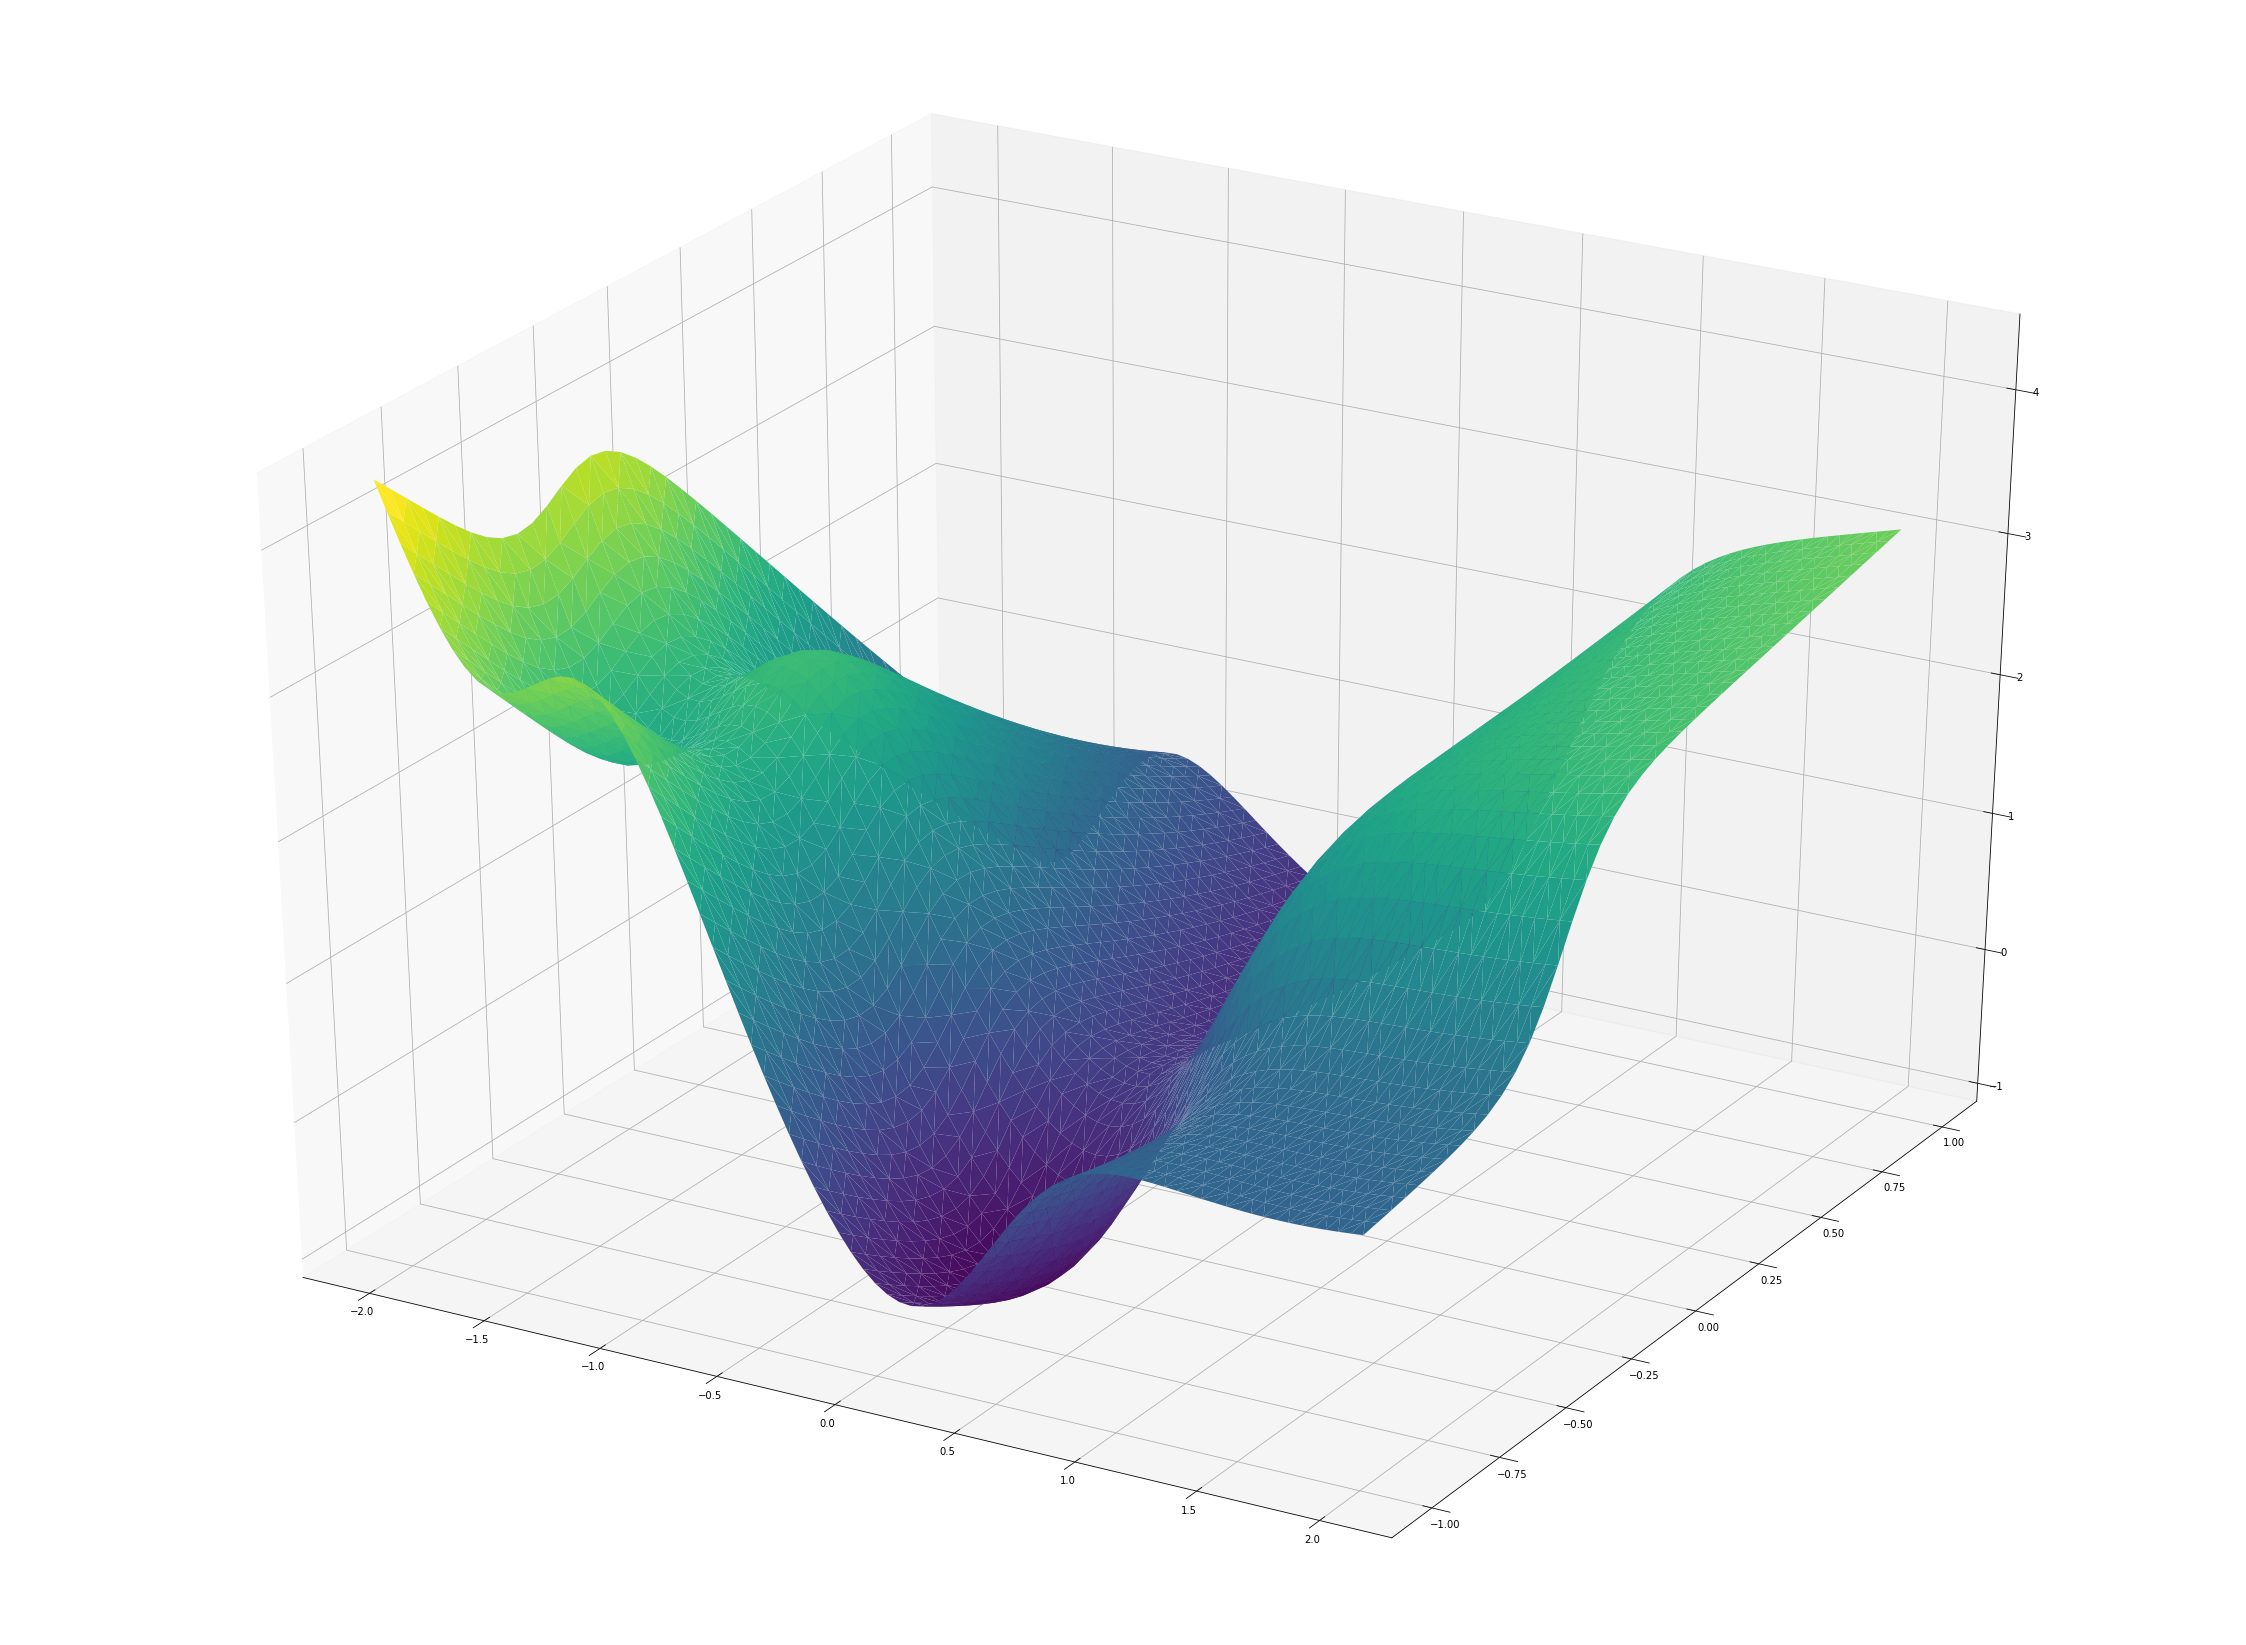

In [37]:
plotting()

In [ ]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 

In [ ]:
#average rmse
print('!-----------V--A-L--I--D--A--T--I---O--N------R-M-S-E----!')
#print(sum(val_err_dict.values())/len(val_err_dict))

print('!---------------T---R---A----I---N----------R-M-S-E------!')
#print(sum(train_err_dict.values())/len(train_err_dict))